# Home Price -- Group Project

## Zhencun Liu, Xinran Tao, Xin Su, Ziyi Zhao

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

## Data Import

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


* We import both train dataset and test dataset and find out both datasets contains 5 rows, but train dataset contains 81 columns while head dataset contains 80 columns. Let’s see all the columns in details:

## Data Exploration

In [5]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

* That’s a lot of variables! We’ll drop irrelevant variable “Id” for now and make a heatmap to see correlations between the rest variables, since heatmap is a popular method to find correlations when there’s big quantity of variables.


In [6]:
train = df_train.copy()
test = df_test.copy()

In [7]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

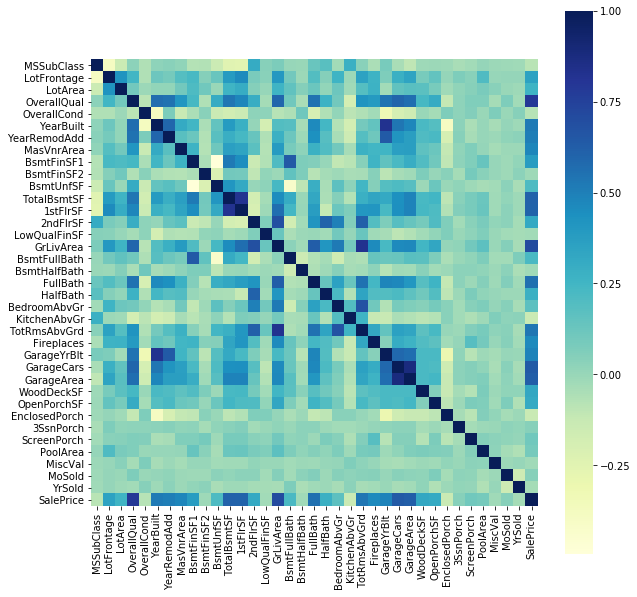

In [8]:
corrmat = train.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,square=True, cmap="YlGnBu");
plt.show()

* It seems like "OverallQual" and "GrlivArea" affect the price the most. 

# Data Prep

### Check Outliers

* We use numerical variable "GrlivArea" to test outlier against "SalePrice" rather than using ordinal variable "OverallQual".

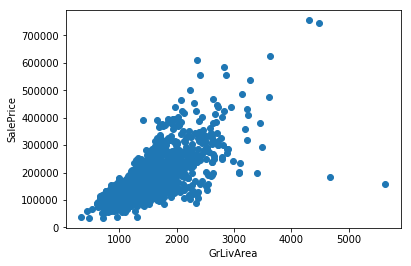

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

* We see there are two houses that have big General Living Area (>4000) but very low SalePrice. These are apparently outliers that we can safely delete.

In [10]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

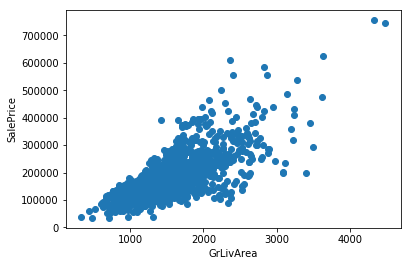

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

* We know that deleting outliers can affect the accuracy of modeling badly. Thus we’ll keep it simple by deleting these two outliers for now.
* The documentation(http://ww2.amstat.org/publications/jse/v19n3/Decock/DataDocumentation.txt) of this dataset also suggest us to do the same thing on outliers.

## Skewness

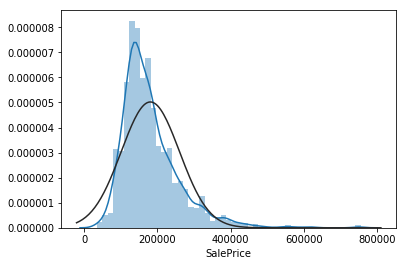

In [12]:
sns.distplot(train['SalePrice'] , fit=norm);
plt.show()

* (Linear) models love normally distributed data. Here, we use a normal distribution bell curve test if the target variable is normally distributed. The graph below indicates our target variable is right skewed. In order to fix the skewness, we need to apply log transformation.


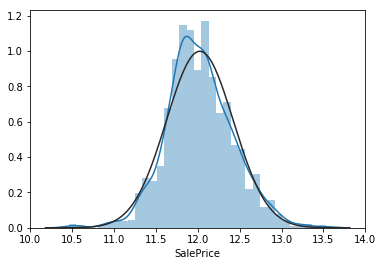

In [13]:
train["SalePrice"] = np.log1p(train["SalePrice"])

sns.distplot(train['SalePrice'] , fit=norm);
plt.show()

* We use the numpy fuction log1p which  applies log(1+x) to all elements of the column

In [14]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


* Combine Train and Test for Data Prepration.

# Correct Column Types

* Before handling the missing value for each column, we found that some columns’ types are incorrect. This happens because some columns, such as Overall Quality, MSSubClass, are originally provided in numbers, but they are truly categorical variables. Thus, we'll fix the column types first.

In [15]:
all_data.columns.to_series().groupby(all_data.dtypes).groups

{dtype('int64'): Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch',
        'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
        'LotArea', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold',
        'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
        'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
       dtype='object'),
 dtype('float64'): Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
        'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea',
        'TotalBsmtSF'],
       dtype='object'),
 dtype('O'): Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
        'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
        'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
        'GarageFinish', 'GarageQual',

* Based on the data description file provided in Kaggle, we understand the meaning of each column, and summarize all columns whose type are needed to be changed as follow. Note that there are some columns are ordinal type, rather than nominal, and then we believe a detailed engineering will be helpful.

* Integer to Object: 'MSSubClass','MoSold','YearBuilt','YearRemodAdd','YrSold',
<br>
* Float to Object: 'GarageYrBlt'
<br>
* Integer to Ordinal: 'OverallCond','OverallQual',
<br>
* Object to Ordinal: 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual','FireplaceQu','GarageFinish', 'GarageQual','GarageCond','PoolQC'

In [16]:
for col in ('MSSubClass','MoSold','YearBuilt','YearRemodAdd','YrSold',
            'GarageYrBlt','OverallCond','OverallQual','ExterQual', 'ExterCond',
            'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'KitchenQual','FireplaceQu', 'GarageFinish', 'GarageQual',
            'GarageCond','PoolQC'):
    all_data[col] = all_data[col].astype(str)

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

* Based on the data description file provided in Kaggle, we understand the meaning of each column, and summarize all columns whose type are needed to be changed as follow. Note that there are some columns are ordinal type, rather than nominal, and then we believe a detailed engineering will be helpful.


# Missing Value

* First, we check the percentage of missing in every column and list them in descending order in terms of missing ration(column with missing ratio = 0 is not listed). 

In [18]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
LotFrontage,16.660953
GarageType,5.382242
MasVnrType,0.822763
MasVnrArea,0.788481
MSZoning,0.137127
BsmtFullBath,0.068564
BsmtHalfBath,0.068564


* We fill all missing in categorical type columns with “None”; missing in numerical type columns with”0”; missing in date/year and integer type columns with mode. 

In [19]:
for col in ("PoolQC", "MiscFeature", "Alley","Fence","FireplaceQu",
            'GarageType', 'GarageFinish','GarageQual', 'GarageCond','BsmtQual', 
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"MasVnrType", "MSSubClass"):
    all_data[col] = all_data[col].fillna('None')

In [20]:
for col in ('GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',"MasVnrArea"):
    all_data[col] = all_data[col].fillna(0)

In [21]:
for col in ('Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType','GarageYrBlt','MSZoning'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [22]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

* Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood

In [23]:
all_data = all_data.drop(['Utilities'], axis=1)

* For "utilities" feature all records are "AllPub", except for one "NoSeWa" and 2 NA . Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modelling. We can then safely remove it.

In [24]:
all_data["Functional"] = all_data["Functional"].fillna("Typical")

* Data description says NA means typical.


In [25]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [26]:
all_data.shape

(2917, 78)

## Feature Engineering

In [27]:
all_data = all_data.replace({
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "GarageFinish": {"None": 0, "Unf": 1, "RFn": 2, "Fin": 3}}
                     )

* In order to show the characteristic of those selected ordinal variables, based on the data description file, we replace each original data into different integer level, for example, Poor replaced by 1, Excellent replaced by 5.


In [28]:
for col in ('MSSubClass','MoSold','YearBuilt','YearRemodAdd','YrSold',
            'GarageYrBlt','OverallCond','OverallQual','ExterQual', 'ExterCond',
            'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'KitchenQual','FireplaceQu', 'GarageFinish', 'GarageQual',
            'GarageCond','PoolQC'):
    all_data[col] = all_data[col].astype(str)

In [29]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

In [30]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


* As discussed above, skewness is one thing that should be considered. We changed the skewness of target variable, and in here, we want to review the skewness of all numeric independent variables. The following table shows the top 10 columns with high skewness.


In [31]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 28 skewed numerical features to Box Cox transform


* To solve the problem of numeric variables’ skewness, we use a method called Cox Box Transformation to transform skewed variables whose skewness is greater than 0.75 into normal distribution for better modeling.


In [32]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 628)


* At last, in order to perform better model, we use pandas get_dummy function to represent all categorical variable in numeric way. The result is shown followed, the shape of our training data is (1458, 626)


In [33]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [34]:
train.shape

(1458, 628)

In [35]:
test.shape

(1459, 628)

In [36]:
train['SalePrice'] = y_train

/Users/xin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
0,11.692623,11.686189,0.0,1.540963,11.170327,0.0,0.730463,0.000000,7.483296,0.000000,...,0,0,0,0,0,0,1,0,0,12.247699
1,12.792276,0.000000,0.0,1.540963,12.062832,0.0,0.000000,0.730463,8.897844,0.000000,...,0,0,0,0,0,1,0,0,0,12.109016
2,11.892039,11.724598,0.0,1.540963,10.200343,0.0,0.730463,0.000000,9.917060,0.000000,...,0,0,0,0,0,0,1,0,0,12.317171
3,12.013683,11.354094,0.0,1.540963,8.274266,0.0,0.730463,0.000000,10.468500,8.797736,...,0,0,0,0,1,0,0,0,0,11.849405
4,12.510588,12.271365,0.0,1.820334,10.971129,0.0,0.730463,0.000000,10.221051,0.000000,...,0,0,0,0,0,0,1,0,0,12.429220


## Modeling

* We used auto machine learning in H2O to select the best model. We saved train as htrain and test as htest in H2O workspace. We selected all the columns from htrain except “SalePrice” as independent variable x and “SalePrice” as dependent variable y and ran auto machine learning for 300 seconds. From the leaderboard, we can see that StackedEnsemble_AllModels ranked highest based on the least mean_residual_deviance, root mean square error, mean absolute error and Root Mean Squared Logarithmic Error . We predicted the value of y according to the best model.


In [38]:
import h2o
from h2o.automl import H2OAutoML

In [39]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_161"; Java(TM) SE Runtime Environment (build 1.8.0_161-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from /Users/xin/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/_j/gk81ywq57kv9sbvbwbwysfh00000gn/T/tmpn6l06ac_
  JVM stdout: /var/folders/_j/gk81ywq57kv9sbvbwbwysfh00000gn/T/tmpn6l06ac_/h2o_xin_started_from_python.out
  JVM stderr: /var/folders/_j/gk81ywq57kv9sbvbwbwysfh00000gn/T/tmpn6l06ac_/h2o_xin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,08 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.4
H2O cluster version age:,1 month and 10 days
H2O cluster name:,H2O_from_python_xin_firm8q
H2O cluster total nodes:,1
H2O cluster free memory:,1.778 Gb
H2O cluster total cores:,0
H2O cluster allowed cores:,0
H2O cluster status:,"accepting new members, healthy"


In [40]:
htrain = h2o.H2OFrame(train)
htest = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [41]:
x = htrain.columns
y = "SalePrice"
x.remove(y)

# Run AutoML for 300 seconds
aml = H2OAutoML(max_runtime_secs = 300)
aml.train(x = x, y = y,
          training_frame = htrain)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


30s, 60s, 300s is the best

In [42]:
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mae,rmsle
StackedEnsemble_BestOfFamily_0_AutoML_20180419_190808,0.022199,0.148994,0.103366,0.011576
StackedEnsemble_AllModels_0_AutoML_20180419_190808,0.022199,0.148994,0.103366,0.011576
DRF_0_AutoML_20180419_190808,0.023745,0.154094,0.104924,0.011957
XRT_0_AutoML_20180419_190808,0.025251,0.158905,0.110647,0.01234


In [43]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_BestOfFamily_0_AutoML_20180419_190808
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.0028635601617099677
RMSE: 0.05351224310108826
MAE: 0.0394882916169379
RMSLE: 0.004145566800479413
R^2: 0.9823287023741988
Mean Residual Deviance: 0.0028635601617099677
Null degrees of freedom: 1167
Residual degrees of freedom: 1165
Null deviance: 189.26953411718023
Residual deviance: 3.3446382688772425
AIC: -3516.805058505297

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.016589961672018944
RMSE: 0.12880202510837688
MAE: 0.09210848396973743
RMSLE: 0.01014170573968456
R^2: 0.8886085177654541
Mean Residual Deviance: 0.016589961672018944
Null degrees of freedom: 289
Residual degrees of freedom: 287
Null deviance: 43.596567593919254
Residual deviance: 4.811088884885494
AIC: -357.71332141702004

ModelMetricsRegre

In [44]:
preds = aml.leader.predict(htest)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [45]:
preds.head()

predict
11.7432
11.8629
12.1486
12.1669
12.178
12.0872
12.0653
12.0857
12.0962
11.6863


## Export

* We exported the result from H2O to csv file and reread it into jupyter notebook. We changed the log transformation back to original values and saved result according to kaggle sample submission format.


In [47]:
h2o.h2o.export_file(preds,"/Users/xin/downloads/Archive/preds.csv" )

Export File progress: |███████████████████████████████████████████████████| 100%


In [48]:
pred =pd.read_csv("preds.csv")

In [49]:
pred.head()

,predict
0,11.743221
1,11.862930
2,12.148629
3,12.166876
4,12.177974


In [50]:
pred["SalePrice"] = np.expm1(pred["predict"])

In [51]:
final = pd.DataFrame()

* create a empty dataframe called final

In [52]:
final['Id'] = df_test['Id']

* Add a ID column to final dataset

In [53]:
final['SalePrice'] =pred['SalePrice']

* add SalePrice to final

In [54]:
final.tail()

,Id,SalePrice
1454,2915,82100.857341
1455,2916,83130.488117
1456,2917,145664.624954
1457,2918,110828.525330
1458,2919,209348.828528


In [55]:
final.to_csv("DMProject.csv",sep=",",index=False)

In [56]:
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? y
H2O session _sid_ab01 closed.
